In [2]:
import pyam
import pandas as pd
import nomenclature
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

<IPython.core.display.Javascript object>

In [51]:
var_list = [
'Agricultural Demand',
'Agricultural Demand|Energy',
'Agricultural Demand|Energy|Crops',
'Agricultural Demand|Energy|Crops|1st generation',
'Agricultural Demand|Energy|Crops|2nd generation',
'Agricultural Demand|Energy|Residues',
'Agricultural Demand|Non-Energy',
'Agricultural Demand|Non-Energy|Crops',
'Agricultural Demand|Non-Energy|Crops|Feed',
'Agricultural Demand|Non-Energy|Crops|Food',
'Agricultural Demand|Non-Energy|Crops|Other',
'Agricultural Demand|Non-Energy|Livestock',
'Agricultural Demand|Non-Energy|Livestock|Food',
'Agricultural Demand|Non-Energy|Livestock|Other',
'Agricultural Production',
'Agricultural Production|Energy',
'Agricultural Production|Energy|Crops',
'Agricultural Production|Energy|Residues',
'Agricultural Production|Non-Energy',
'Agricultural Production|Non-Energy|Crops',
'Agricultural Production|Non-Energy|Livestock',
'Land Cover',
'Land Cover|Built-up Area',
'Land Cover|Cropland',
'Land Cover|Cropland|Energy Crops',
'Land Cover|Cropland|Irrigated',
'Land Cover|Cropland|Rainfed',
'Land Cover|Forest',
'Land Cover|Forest|Afforestation and Reforestation',
'Land Cover|Forest|Forestry|Harvested Area',
'Land Cover|Forest|Managed',
'Land Cover|Forest|Natural Forest',
'Land Cover|Forest|Natural Forest|Primary Forest',
'Land Cover|Other Arable Land',
'Land Cover|Other Land',
'Land Cover|Other Natural Land',
'Land Cover|Pasture',
'Land Cover|Protected Area',
]

In [52]:
df = pyam.read_iiasa(
    'geo7_internal',
    variable=var_list,
    region=['Africa (UNEP-R5)', 'Asia and the Pacific (UNEP-R5)', 'Eastern Europe (UNEP-R5)',
       'Latin America and Caribbean (UNEP-R5)', 'Western Europe and Other States (UNEP-R5)','World',
       'Africa (UN-R5)', 'Asia and the Pacific (UN-R5)', 'Eastern Europe (UN-R5)',
       'Latin America and Caribbean (UN-R5)', 'Western Europe and Other States (UN-R5)'],
    model=['AIM/Hub-Global 2.4', 'IMAGE 3.3'],
    scenario=['REF', 'TECH-TP', 'LIFE-TP']
)
df_un_total_filtered = df.timeseries().reset_index()

pyam.iiasa - INFO: You are connected to the IXSE_GEO7_INTERNAL scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/geo7-internal/#/about
2024-01-16 15:35:12 INFO     You are connected to the IXSE_GEO7_INTERNAL scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/geo7-internal/#/about
pyam.iiasa - INFO: You are connected as user `LaszloVreedenburgh`
2024-01-16 15:35:12 INFO     You are connected as user `LaszloVreedenburgh`


In [53]:
df_un_total_filtered['region'] = df_un_total_filtered['region'].replace({'Africa (UNEP-R5)':'Africa (UN-R5)', 
                                                            'Asia and the Pacific (UNEP-R5)':'Asia and the Pacific (UN-R5)',
                                                            'Eastern Europe (UNEP-R5)':'Eastern Europe (UN-R5)',
                                                            'Latin America and Caribbean (UNEP-R5)':'Latin America and Caribbean (UN-R5)',
                                                            'Western Europe and Other States (UNEP-R5)':'Western Europe and Other States (UN-R5)'})


In [54]:
df_un_total_filtered

,model,scenario,region,variable,unit,2005,2010,2015,2020,2025,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,AIM/Hub-Global 2.4,LIFE-TP,Africa (UN-R5),Agricultural Demand,million t DM/yr,NaN,300.7069,357.4776,417.1069,429.0786,...,1310.3306,1408.0518,1541.5061,1667.0467,1694.3363,1663.2746,1718.4623,1648.2884,1622.9251,1648.2893
1,AIM/Hub-Global 2.4,LIFE-TP,Africa (UN-R5),Agricultural Demand|Energy,million t DM/yr,NaN,0.0000,1.5156,2.9649,6.4946,...,782.4342,853.5420,962.5796,1066.1040,1073.9777,1025.7721,1066.8636,985.2013,951.0258,970.0159
2,AIM/Hub-Global 2.4,LIFE-TP,Africa (UN-R5),Agricultural Demand|Energy|Crops,million t DM/yr,NaN,0.0000,1.5156,2.9649,6.4946,...,782.4342,853.5420,962.5796,1066.1040,1073.9777,1025.7721,1066.8636,985.2013,951.0258,970.0159
3,AIM/Hub-Global 2.4,LIFE-TP,Africa (UN-R5),Agricultural Demand|Energy|Crops|2nd generation,million t DM/yr,NaN,0.0000,1.5156,2.9649,6.4946,...,782.4342,853.5420,962.5796,1066.1040,1073.9777,1025.7721,1066.8636,985.2013,951.0258,970.0159
4,AIM/Hub-Global 2.4,LIFE-TP,Africa (UN-R5),Agricultural Demand|Non-Energy,million t DM/yr,NaN,300.7069,355.9620,414.1420,422.5841,...,527.8964,554.5098,578.9263,600.9427,620.3587,637.5024,651.5987,663.0872,671.8994,678.2735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,IMAGE 3.3,TECH-TP,World,Land Cover|Other Arable Land,million ha,2518.3008,2522.8500,2486.0280,2440.5370,2441.0498,...,NaN,2412.4366,NaN,2385.0210,NaN,2388.6058,NaN,2398.5736,NaN,2474.8936
1197,IMAGE 3.3,TECH-TP,World,Land Cover|Other Land,million ha,4153.9919,4178.2446,4139.9910,4086.5480,4087.0343,...,NaN,4049.0927,NaN,4019.1938,NaN,4023.2125,NaN,4025.8348,NaN,4106.0500
1198,IMAGE 3.3,TECH-TP,World,Land Cover|Other Natural Land,million ha,4153.9919,4178.2446,4139.9910,4086.5480,4087.0343,...,NaN,4049.0927,NaN,4019.1938,NaN,4023.2125,NaN,4025.8348,NaN,4106.0500
1199,IMAGE 3.3,TECH-TP,World,Land Cover|Pasture,million ha,3205.0868,3172.4746,3189.6276,3267.8270,3186.1550,...,NaN,2782.0068,NaN,2750.0972,NaN,2718.8596,NaN,2679.8012,NaN,2623.7348


In [55]:
# Condition to identify rows to be removed
condition_image = (df_un_total_filtered['model'] == 'IMAGE 3.3') & (df_un_total_filtered['scenario'] == 'REF')

# Remove multiple scenarios for aim
aim_scen_to_remove = ['TECH-TP', 'LIFE-TP']
condition_aim = (df_un_total_filtered['model'] == 'AIM/Hub-Global 2.4') & (df_un_total_filtered['scenario'].isin(aim_scen_to_remove))

# Remove rows based on the condition
df_filtered = df_un_total_filtered[~condition_image]
df_filtered = df_filtered[~condition_aim]

df_filtered = df_filtered.reset_index(drop=True)

df_compare_data = pd.melt(df_filtered, id_vars=['model',
                              'scenario',
                              'region',
                              'variable',
                              'unit'
                                ], var_name='year', value_name='value')
df_compare_data['year'] = df_compare_data['year'].astype(int)
df_compare_data = df_compare_data.sort_values('region')
df_compare_data

C:\Users\vreedenbul\AppData\Local\Temp\ipykernel_16620\3996035938.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[~condition_aim]


,model,scenario,region,variable,unit,year,value
0,AIM/Hub-Global 2.4,REF,Africa (UN-R5),Agricultural Demand,million t DM/yr,2005,NaN
4800,IMAGE 3.3,TECH-TP,Africa (UN-R5),Agricultural Demand|Non-Energy|Livestock|Food,million t DM/yr,2040,30.059572
4799,IMAGE 3.3,TECH-TP,Africa (UN-R5),Agricultural Demand|Non-Energy|Livestock,million t DM/yr,2040,35.611745
4798,IMAGE 3.3,TECH-TP,Africa (UN-R5),Agricultural Demand|Non-Energy|Crops|Other,million t DM/yr,2040,237.209067
4797,IMAGE 3.3,TECH-TP,Africa (UN-R5),Agricultural Demand|Non-Energy|Crops|Food,million t DM/yr,2040,437.842180
...,...,...,...,...,...,...,...
7267,IMAGE 3.3,LIFE-TP,World,Agricultural Demand|Non-Energy|Crops|Food,million t DM/yr,2060,2339.452750
7268,IMAGE 3.3,LIFE-TP,World,Agricultural Demand|Non-Energy|Crops|Other,million t DM/yr,2060,2775.877250
7269,IMAGE 3.3,LIFE-TP,World,Agricultural Demand|Non-Energy|Livestock,million t DM/yr,2060,281.520875
7258,IMAGE 3.3,LIFE-TP,World,Agricultural Demand,million t DM/yr,2060,9000.103000


In [58]:
# Define the color palette for scenarios
scenario_colors = {
    "REF": "black",
    "REF-1p5C": "blue",
    "LIFE-TP": "orange",
    "TECH-TP": "magenta",
}
variables = df_compare_data.variable.unique()
for variable in variables:
    df_var = df_compare_data[df_compare_data["variable"] == variable]
    # Get unique regions for creating subplots
    unique_regions = df_var['region'].unique()

    # Create subplots based on the number of unique regions
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

    # Initialize lists to store handles and labels for the legend
    legend_handles = []
    legend_labels = []

    # Iterate through each region and plot in respective subplot
    for idx, region in enumerate(unique_regions):
        row_idx = idx // 3
        col_idx = idx % 3
        
        ax = axes[row_idx, col_idx]  # Select the current subplot
        
        region_data = df_var[df_var['region'] == region]  # Filter data for the current region
        
        # Plot lineplots for each region
        lineplot = sns.lineplot(data=region_data, x="year", y="value", hue="scenario", palette=scenario_colors, 
                    linewidth=2.5, ax=ax)
        
        # Customize ticks and labels for the current subplot
        ax.set_ylabel(region_data["unit"].iloc[0], fontsize=14)  # Set the y-axis label to the unit
        # Set y-axis lower limit to 0
        ax.set_ylim(min(0,ax.get_ylim()[0]), ax.get_ylim()[1])
        ax.set_xlabel('', fontsize=1)
        ax.set_title(f"{region}", fontsize=14)  # Set the title to the region
        ax.set_xticks([2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100])
        ax.set_xticklabels([2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100], 
                        rotation=45, fontsize=14)
        
        # Increase fontsize of y-axis tick labels
        ax.tick_params(axis='y', labelsize=14)

        # Add the lineplot to the legend manually
        legend_handles.append(lineplot)
        legend_labels.append(region)
        # Disable the legend for individual subplots
        ax.legend().set_visible(False)
        ax.grid(True)

        # Add a gray background for the 'World' region subplot
        if region == 'World':
            ax.set_facecolor(color='#ededed')

    # Show legend and grid for the current subplot
    fig.suptitle(f"{variable}", fontsize=16)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, title="Legend", bbox_to_anchor=(1.1, 0.55))
    plt.tight_layout()  # Adjust subplots to prevent overlap
    
    root_variable = variable.split("|")[0].replace(" ", "_")
    variable_name = variable.replace("|", "_").replace(" ", "_").replace("/", "")
    plt.savefig(f"../plots/agri_land/{root_variable}/{variable_name}.png", bbox_inches='tight')
    plt.close()

# Stacked

In [87]:
df_land = pyam.read_iiasa(
    'geo7_internal',
    variable=['Land Cover|Other Land', 
                'Land Cover|Forest',
                'Land Cover|Pasture',
                'Land Cover|Cropland',
                'Land Cover|Built-up Area',],
    region=['World'],
    model=['AIM/Hub-Global 2.4', 'IMAGE 3.3'],
    scenario=['LIFE-TP', 'REF', 'TECH-TP'],
)

pyam.iiasa - INFO: You are connected to the IXSE_GEO7_INTERNAL scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/geo7-internal/#/about
2024-01-18 14:32:22 INFO     You are connected to the IXSE_GEO7_INTERNAL scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/geo7-internal/#/about
pyam.iiasa - INFO: You are connected as user `LaszloVreedenburgh`
2024-01-18 14:32:22 INFO     You are connected as user `LaszloVreedenburgh`


In [88]:
df_land_data = df_land.data
# Condition to identify rows to be removed
condition_image = (df_land_data['model'] == 'IMAGE 3.3') & (df_land_data['scenario'] == 'REF')

# Remove multiple scenarios for aim
aim_scen_to_remove = ['TECH-TP', 'LIFE-TP']
condition_aim = (df_land_data['model'] == 'AIM/Hub-Global 2.4') & (df_land_data['scenario'].isin(aim_scen_to_remove))

# Remove rows based on the condition
df_land_data = df_land_data[~condition_image]
df_land_data = df_land_data[~condition_aim]

df_land_data = df_land_data[df_land_data['year'].isin([2020, 2030, 2050])]

df_land_data = df_land_data.reset_index(drop=True)
df_land_data['change'] = df_land_data['value'].diff()
df_land_data = df_land_data[df_land_data['year'].isin([2030, 2050])] # , 2050
# df_land_data = df_land_data[df_land_data['scenario'].isin(['REF'])]]
df_land_data = df_land_data.sort_values(['year', 'change'])
df_land_data

C:\Users\vreedenbul\AppData\Local\Temp\ipykernel_10968\86265042.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_land_data = df_land_data[~condition_aim]


,model,scenario,region,variable,unit,year,value,change
28,IMAGE 3.3,LIFE-TP,World,Land Cover|Pasture,million ha,2030,3013.091800,-253.635800
43,IMAGE 3.3,TECH-TP,World,Land Cover|Pasture,million ha,2030,3120.484400,-147.342600
10,AIM/Hub-Global 2.4,REF,World,Land Cover|Other Land,million ha,2030,3727.744000,-91.368800
7,AIM/Hub-Global 2.4,REF,World,Land Cover|Forest,million ha,2030,3720.622300,-63.857200
40,IMAGE 3.3,TECH-TP,World,Land Cover|Other Land,million ha,2030,4052.838100,-33.709900
22,IMAGE 3.3,LIFE-TP,World,Land Cover|Forest,million ha,2030,3911.801600,4.687600
16,IMAGE 3.3,LIFE-TP,World,Land Cover|Built-up Area,million ha,2030,88.258106,12.778056
31,IMAGE 3.3,TECH-TP,World,Land Cover|Built-up Area,million ha,2030,88.258106,12.778056
1,AIM/Hub-Global 2.4,REF,World,Land Cover|Built-up Area,million ha,2030,93.418200,13.577200
37,IMAGE 3.3,TECH-TP,World,Land Cover|Forest,million ha,2030,3971.888400,51.488000


2024-01-17 15:32:10 INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-01-17 15:32:10 INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-01-17 15:32:10 INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-01-17 15:32:10 INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-01-17 15:32:10 INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If 

Land Cover|Other Land
Land Cover|Forest
Land Cover|Other Land
Land Cover|Forest


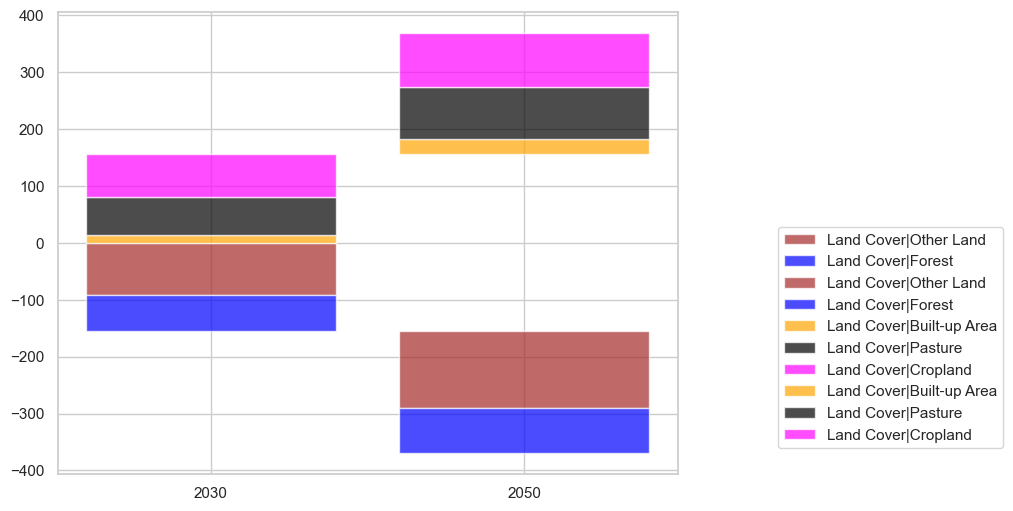

In [46]:
import seaborn as sns
import seaborn.objects as so
sns.set_theme(style="whitegrid")

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
# Assign colors to each category
category_colors = {
    "Land Cover|Other Land": "brown",
    "Land Cover|Forest": "blue",
    "Land Cover|Built-up Area": "orange",
    "Land Cover|Cropland": "magenta",
    "Land Cover|Pasture": "black"
}

df_land_negative = df_land_data[df_land_data['change'] < 0]
df_land_positve = df_land_data[df_land_data['change'] >= 0]


# for year in df_land_negative['year'].unique():
#     df_land_negative = df_land_data[df_land_data['year'] == year]
#     df_land_positve = df_land_data[df_land_data['year'] == year]

# Stacked column bar plot without error bars
for i, category in enumerate(df_land_negative['variable']):
    print(category)
    category_values = df_land_negative['change'].iloc[i]
    category_bottom = df_land_negative['change'].iloc[:i].sum()
    ax.bar(
        x=str(df_land_negative['year'].iloc[i]),
        height=category_values,
        bottom=category_bottom,
        color=category_colors[category],  # You can specify different colors here
        alpha=0.7,
        label=category
    )

# Stacked column bar plot without error bars
for i, category in enumerate(df_land_positve['variable']):
    category_values = df_land_positve['change'].iloc[i]
    category_bottom = df_land_positve['change'].iloc[:i].sum()
    ax.bar(
        x=str(df_land_positve['year'].iloc[i]),
        height=category_values,
        bottom=category_bottom,
        color=category_colors[category],  # You can specify different colors here
        alpha=0.7,
        label=category
    )

ax.legend(bbox_to_anchor=(1.15, 0.55))

2024-01-17 17:32:08 INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-01-17 17:32:08 INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-01-17 17:32:08 INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-01-17 17:32:08 INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-01-17 17:32:08 INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If 

2024-01-17 17:32:08 INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-01-17 17:32:08 INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-01-17 17:32:08 INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-01-17 17:32:08 INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-01-17 17:32:08 INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If 

Land Cover|Pasture
Land Cover|Pasture
Land Cover|Pasture
Land Cover|Other Land
Land Cover|Pasture
Land Cover|Other Land
Land Cover|Other Land
Land Cover|Forest
Land Cover|Other Land
Land Cover|Forest


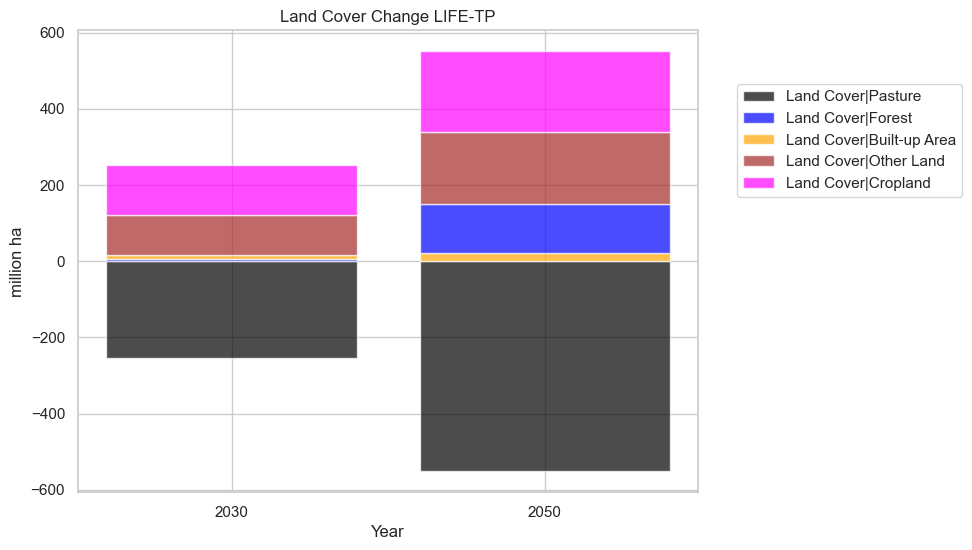

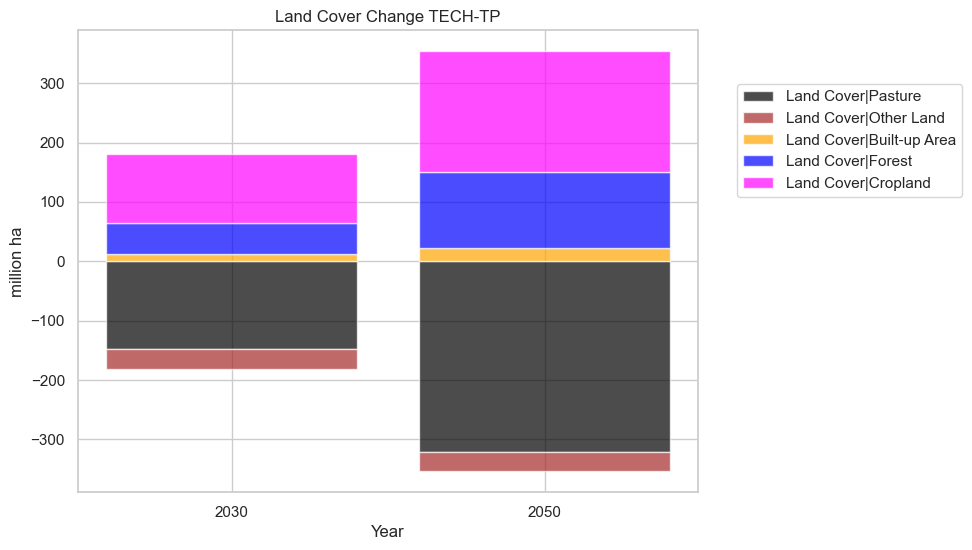

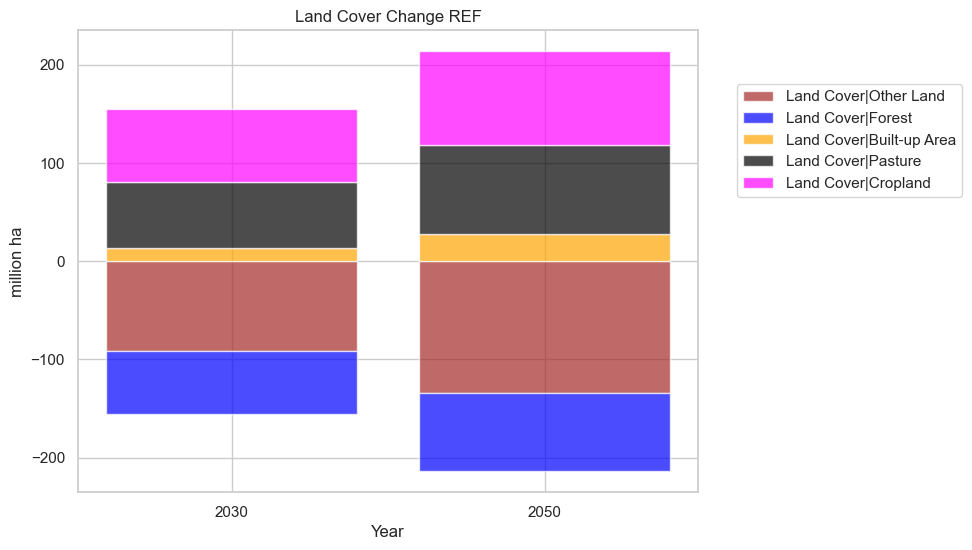

In [86]:
for scenario in df_land_data['scenario'].unique():
    df_land_data_temp = df_land_data[df_land_data['scenario'] == scenario]
    df_land_negative = df_land_data_temp[df_land_data_temp['change'] < 0]
    df_land_positve = df_land_data_temp[df_land_data_temp['change'] >= 0]

    # Plotting
    fig, ax = plt.subplots(figsize=(8, 6))
    # Assign colors to each category
    category_colors = {
        "Land Cover|Other Land": "brown",
        "Land Cover|Forest": "blue",
        "Land Cover|Built-up Area": "orange",
        "Land Cover|Cropland": "magenta",
        "Land Cover|Pasture": "black"
    }

    for year in df_land_data_temp['year'].unique():
        df_land_negative_temp = df_land_negative[df_land_negative['year'] == year]
        df_land_positive_temp = df_land_positve[df_land_positve['year'] == year]

        # Stacked column bar plot without error bars
        for i, category in enumerate(df_land_negative_temp['variable']):
            print(category)
            category_values = df_land_negative_temp['change'].iloc[i]
            category_bottom = df_land_negative_temp['change'].iloc[:i].sum()
            ax.bar(
                x=str(df_land_negative_temp['year'].iloc[i]),
                height=category_values,
                bottom=category_bottom,
                color=category_colors[category],  # You can specify different colors here
                alpha=0.7,
                label=category
            )

        # Stacked column bar plot without error bars
        for i, category in enumerate(df_land_positive_temp['variable']):
            category_values = df_land_positive_temp['change'].iloc[i]
            category_bottom = df_land_positive_temp['change'].iloc[:i].sum()
            ax.bar(
                x=str(df_land_positive_temp['year'].iloc[i]),
                height=category_values,
                bottom=category_bottom,
                color=category_colors[category],  # You can specify different colors here
                alpha=0.7,
                label=category
            )
    handles, labels = ax.get_legend_handles_labels()
    
    ax.legend(handles=handles[:5], labels=labels[:5], bbox_to_anchor=(1.05, 0.9))
    # Set labels and title
    plt.xlabel("Year", fontsize=12)
    plt.ylabel(df_land_negative["unit"].iloc[0], fontsize=12)
    plt.title(f'Land Cover Change {scenario}')


2030
Land Cover|Pasture
Land Cover|Pasture
Land Cover|Other Land
Land Cover|Other Land
Land Cover|Forest
2050
Land Cover|Pasture
Land Cover|Pasture
Land Cover|Other Land
Land Cover|Other Land
Land Cover|Forest


C:\Users\vreedenbul\AppData\Local\Temp\ipykernel_10968\3404505521.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_land_negative = df_land_data_temp[df_land_data['change'] < 0]
C:\Users\vreedenbul\AppData\Local\Temp\ipykernel_10968\3404505521.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_land_positve = df_land_data_temp[df_land_data['change'] >= 0]
C:\Users\vreedenbul\AppData\Local\Temp\ipykernel_10968\3404505521.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_land_negative = df_land_data_temp[df_land_data['change'] < 0]
C:\Users\vreedenbul\AppData\Local\Temp\ipykernel_10968\3404505521.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_land_positve = df_land_data_temp[df_land_data['change'] >= 0]


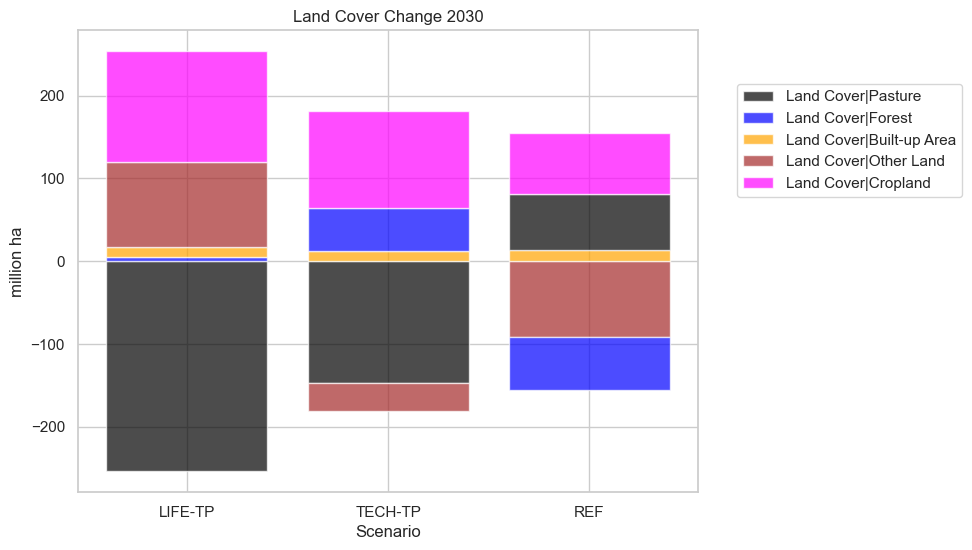

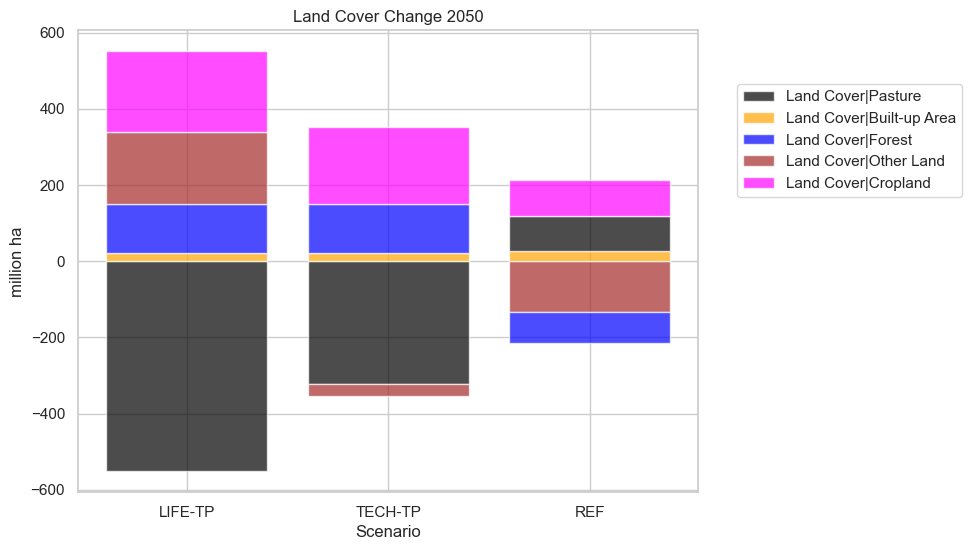

In [76]:
for year in df_land_data['year'].unique():
    print(year)
    df_land_data_temp = df_land_data[df_land_data['year'] == year]
    df_land_negative = df_land_data_temp[df_land_data['change'] < 0]
    df_land_positve = df_land_data_temp[df_land_data['change'] >= 0]

    # Plotting
    fig, ax = plt.subplots(figsize=(8, 6))
    # Assign colors to each category
    category_colors = {
        "Land Cover|Other Land": "brown",
        "Land Cover|Forest": "blue",
        "Land Cover|Built-up Area": "orange",
        "Land Cover|Cropland": "magenta",
        "Land Cover|Pasture": "black"
    }

    for scenario in df_land_data['scenario'].unique():
        df_land_negative_temp = df_land_negative[df_land_negative['scenario'] == scenario]
        df_land_positive_temp = df_land_positve[df_land_positve['scenario'] == scenario]

        # Stacked column bar plot without error bars
        for i, category in enumerate(df_land_negative_temp['variable']):
            print(category)
            category_values = df_land_negative_temp['change'].iloc[i]
            category_bottom = df_land_negative_temp['change'].iloc[:i].sum()
            ax.bar(
                x=scenario,
                height=category_values,
                bottom=category_bottom,
                color=category_colors[category],  # You can specify different colors here
                alpha=0.7,
                label=category
            )

        # Stacked column bar plot without error bars
        for i, category in enumerate(df_land_positive_temp['variable']):
            category_values = df_land_positive_temp['change'].iloc[i]
            category_bottom = df_land_positive_temp['change'].iloc[:i].sum()
            ax.bar(
                x=scenario,
                height=category_values,
                bottom=category_bottom,
                color=category_colors[category],  # You can specify different colors here
                alpha=0.7,
                label=category
            )
    handles, labels = ax.get_legend_handles_labels()
    
    ax.legend(handles=handles[:5], labels=labels[:5], bbox_to_anchor=(1.05, 0.9))
    # Set labels and title
    plt.xlabel("Scenario", fontsize=12)
    plt.ylabel(df_land_negative["unit"].iloc[0], fontsize=12)
    plt.title(f'Land Cover Change {year}')


C:\Users\vreedenbul\AppData\Local\Temp\ipykernel_10968\1435035164.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_land_negative = df_land_data_temp[df_land_data['change'] < 0]
C:\Users\vreedenbul\AppData\Local\Temp\ipykernel_10968\1435035164.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_land_positive = df_land_data_temp[df_land_data['change'] >= 0]
C:\Users\vreedenbul\AppData\Local\Temp\ipykernel_10968\1435035164.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_land_negative = df_land_data_temp[df_land_data['change'] < 0]
C:\Users\vreedenbul\AppData\Local\Temp\ipykernel_10968\1435035164.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_land_positive = df_land_data_temp[df_land_data['change'] >= 0]


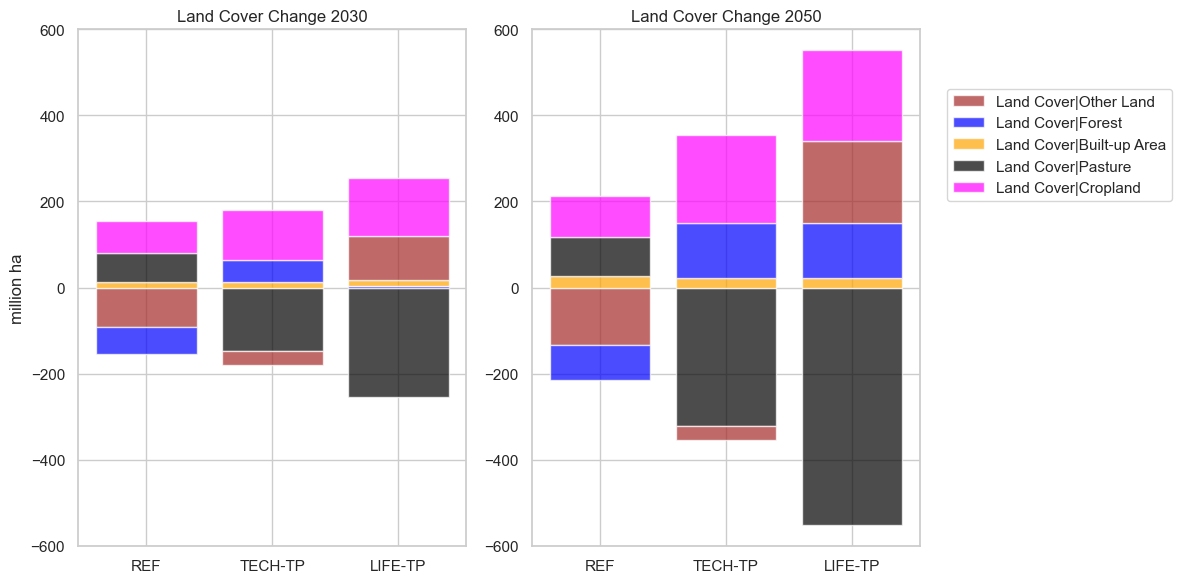

In [89]:
# Set the number of columns for subplots
num_cols = 2
# Calculate the number of rows needed
num_rows = 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))
# Flatten the axes array for easy iteration
axes = axes.flatten()

for idx, year in enumerate(df_land_data['year'].unique()):
    df_land_data_temp = df_land_data[df_land_data['year'] == year]
    df_land_negative = df_land_data_temp[df_land_data_temp['change'] < 0]
    df_land_positive = df_land_data_temp[df_land_data_temp['change'] >= 0]

    # Select the current subplot
    ax = axes[idx]

    # Assign colors to each category
    category_colors = {
        "Land Cover|Other Land": "brown",
        "Land Cover|Forest": "blue",
        "Land Cover|Built-up Area": "orange",
        "Land Cover|Cropland": "magenta",
        "Land Cover|Pasture": "black"
    }

    for scenario in ['REF', 'TECH-TP', 'LIFE-TP']:
        df_land_negative_temp = df_land_negative[df_land_negative['scenario'] == scenario]
        df_land_positive_temp = df_land_positive[df_land_positive['scenario'] == scenario]

        # Stacked column bar plot without error bars
        for i, category in enumerate(df_land_negative_temp['variable']):
            category_values = df_land_negative_temp['change'].iloc[i]
            category_bottom = df_land_negative_temp['change'].iloc[:i].sum()
            ax.bar(
                x=scenario,
                height=category_values,
                bottom=category_bottom,
                color=category_colors[category],
                alpha=0.7,
                label=category
            )

        # Stacked column bar plot without error bars
        for i, category in enumerate(df_land_positive_temp['variable']):
            category_values = df_land_positive_temp['change'].iloc[i]
            category_bottom = df_land_positive_temp['change'].iloc[:i].sum()
            ax.bar(
                x=scenario,
                height=category_values,
                bottom=category_bottom,
                color=category_colors[category],
                alpha=0.7,
                label=category
            )

    handles, labels = ax.get_legend_handles_labels()

    
    
    # Set labels and title for each subplot
    # ax.set_xlabel("Scenario", fontsize=12)
    ax.set_ylim(-600, 600)
    ax.set_title(f'Land Cover Change {year}')

axes[0].set_ylabel(df_land_negative["unit"].iloc[0], fontsize=12)
# Create a unique legend for each subplot
ax.legend(handles=handles[:5], labels=labels[:5], bbox_to_anchor=(1.05, 0.9))
# Adjust layout to prevent overlap
plt.tight_layout()
# plt.savefig(f"../plots/agri_land/land_cover_change.png", bbox_inches='tight')
# plt.close()